In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from shapely import Polygon, Point, LineString, LinearRing, box

In [18]:
p = Polygon([[0, 0], [2, 0], [2, 2], [0, 2]])
print(p)
p.minimum_clearance

POLYGON ((0 0, 2 0, 2 2, 0 2, 0 0))


2.0

In [16]:
print(p.geom_type)

Polygon


In [21]:
p2 = Point(3, 3)
print(p.distance(p2))

1.4142135623730951


In [22]:
print(p.representative_point)

<bound method BaseGeometry.representative_point of <POLYGON ((0 0, 2 0, 2 2, 0 2, 0 0))>>


In [30]:
ring = LinearRing([(0, 0), (1, 1), (0, 1)])

In [33]:
# 判断 ring 是否为闭合的
print(ring.is_ring)

True


In [37]:
p = Polygon([(0, 0), (0, 3), (3, 3), (3, 0)], [[(1, 1), (2, 1), (2, 2), (1, 2)]])

In [46]:
list(p.exterior.coords)

[(0.0, 0.0), (0.0, 3.0), (3.0, 3.0), (3.0, 0.0), (0.0, 0.0)]

In [71]:
list(p.interiors)

[<LINEARRING (1 1, 2 1, 2 2, 1 2, 1 1)>]

In [51]:
b = box(0, 0, 1, 1)

In [59]:
from shapely.geometry.polygon import orient
b1 = orient(b, 1)

In [63]:
a = LineString([(0, 0), (1, 1), (1, 2), (2, 2)])
b = LineString([(0, 0), (1, 1), (2, 1), (2, 2)])
x = a.intersection(b)
print(x)

GEOMETRYCOLLECTION (LINESTRING (0 0, 1 1), POINT (2 2))


In [65]:
list(x.geoms)

[<LINESTRING (0 0, 1 1)>, <POINT (2 2)>]

In [67]:
from shapely import MultiLineString

In [68]:
lines = MultiLineString([[[0, 0], [0, 1]], [[1, 0], [1, 1]]])


In [72]:
lines.length

2.0

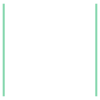

In [74]:
lines

In [82]:
from shapely import MultiPoint
m = MultiPoint([(0, 0), (1, 1), (1, -1), (2, 0)]).convex_hull
list(m.exterior.coords)

[(1.0, -1.0), (0.0, 0.0), (1.0, 1.0), (2.0, 0.0), (1.0, -1.0)]

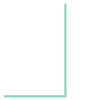

In [86]:
from shapely import affinity

line = LineString([(1, 3), (1, 1), (4, 1)])
rotated_a = affinity.rotate(line, 90)
rotated_b = affinity.rotate(line, 90, origin="centroid")
# rotated_a
rotated_b

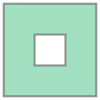

In [89]:
from shapely.ops import clip_by_rect

polygon = Polygon(
    shell=[(0, 0), (0, 30), (30, 30), (30, 0), (0, 0)],
    holes=[[(10, 10), (20, 10), (20, 20), (10, 20), (10, 10)]],
)
clipped_polygon = clip_by_rect(polygon, 5, 5, 15, 15)
polygon

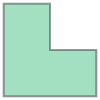

In [91]:
clipped_polygon

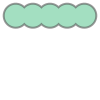

In [93]:
from shapely.ops import unary_union
polygons = [Point(i, 0).buffer(0.7) for i in range(5)]
unary_union(polygons)

In [95]:
polygons

[<POLYGON ((0.7 0, 0.697 -0.069, 0.687 -0.137, 0.67 -0.203, 0.647 -0.268, 0.6...>,
 <POLYGON ((1.7 0, 1.697 -0.069, 1.687 -0.137, 1.67 -0.203, 1.647 -0.268, 1.6...>,
 <POLYGON ((2.7 0, 2.697 -0.069, 2.687 -0.137, 2.67 -0.203, 2.647 -0.268, 2.6...>,
 <POLYGON ((3.7 0, 3.697 -0.069, 3.687 -0.137, 3.67 -0.203, 3.647 -0.268, 3.6...>,
 <POLYGON ((4.7 0, 4.697 -0.069, 4.687 -0.137, 4.67 -0.203, 4.647 -0.268, 4.6...>]

In [97]:
from shapely.ops import nearest_points

triangle = Polygon([(0, 0), (1, 0), (0.5, 1), (0, 0)])
square = Polygon([(0, 2), (1, 2), (1, 3), (0, 3), (0, 2)])
list(nearest_points(triangle, square))

[<POINT (0.5 1)>, <POINT (0.5 2)>]

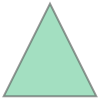

In [99]:
triangle

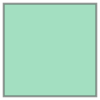

In [100]:
square

In [132]:
from shapely import GeometryCollection
S = []
S.append(Polygon(((155, 333), (100, 410), (10, 380), (10, 286), (100, 257))))
S.append(Polygon(((140, 200), (95, 262), (23, 238), (23, 162), (95, 138))))
S.append(Polygon(((301, 200), (249, 273), (163, 245), (163, 155), (249, 127))))
S.append(Polygon(((454, 200), (400, 276), (311, 247), (311, 153), (400, 124))))
S.append(Polygon(((606, 200), (550, 277), (460, 247), (460, 153), (550, 123))))
S.append(Polygon(((600, 67), (548, 138), (465, 110), (465, 23), (548, -4))))
S.append(Polygon(((283, 333), (243, 389), (178, 367), (178, 299), (243, 278))))
S.append(Polygon(((143, 67), (96, 131), (20, 107), (20, 27), (96, 2))))
S.append(Polygon(((297, 67), (247, 135), (167, 109), (167, 24), (247, -2))))
S.append(Polygon(((442, 333), (396, 397), (321, 373), (321, 294), (396, 270))))
S.append(Polygon(((587, 333), (544, 392), (475, 369), (475, 297), (544, 275))))
C = GeometryCollection(S)

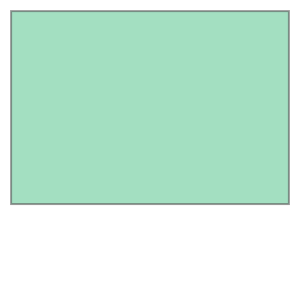

In [133]:
C.bounds
b = box(*C.bounds)
b

In [134]:
from shapely import plotting

(<matplotlib.patches.PathPatch at 0x1fb929939d0>,
 <matplotlib.lines.Line2D at 0x1fb9299d2d0>)

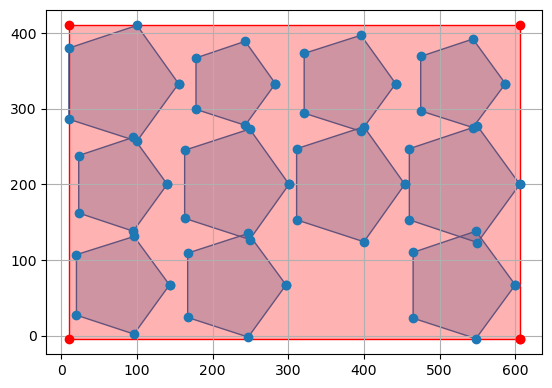

In [139]:
from matplotlib import pyplot as plt

plt.figure()
for i in range(len(S)):
    plotting.plot_polygon(S[i])
plotting.plot_polygon(b, color="red")

In [141]:
# 生成一个指定面积为1000的随机五边形
from shapely.geometry import Polygon
import random
def random_polygon(area):
    # 生成一个随机点
    def random_point():
        return Point(random.random() * 100, random.random() * 100)
    # 生成一个随机的多边形
    def random_poly():
        return Polygon([[random_point() for i in range(5)]])
    # 生成一个随机的多边形，直到其面积大于area
    while True:
        poly = random_poly()
        if poly.area > area:
            return poly

In [152]:
import random
from shapely.geometry import Point, Polygon

# 指定目标面积
target_area = 50.0  # 修改为你想要的目标面积

while True:
    # 随机生成五个点的坐标
    points = [(random.uniform(0, 100), random.uniform(0, 100)) for _ in range(5)]

    # 创建Polygon对象
    polygon = Polygon(points)

    # 计算生成的五边形的面积
    generated_area = polygon.area

    # 检查是否接近目标面积
    tolerance = 1.0  # 允许的面积偏差
    if abs(generated_area - target_area) < tolerance:
        break

# 打印生成的五边形的坐标和面积
print("生成的五边形坐标:", polygon.exterior.coords)
print("生成的五边形面积:", generated_area)

生成的五边形坐标: <shapely.coords.CoordinateSequence object at 0x000001FB92AB9AD0>
生成的五边形面积: 50.07642367885154


In [153]:
random_polygon.is_simple

False

In [154]:
def edges_not_parallel(polygon: Polygon):
    coords = list(polygon.exterior.coords)
    num_edges = len(coords) - 1

    slopes = set()  # 斜率

    for i in range(num_edges):
        x1, y1 = coords[i]
        x2, y2 = coords[i + 1]

        slope = (y2 - y1) / (x2 - x1) if x2 != x1 else float('inf')
        if slope in slopes:
            return False

        slopes.add(slope)

    return True

In [157]:
p = Polygon(((0, 0), (0, 1), (1,1), (1, 0)))
edges_not_parallel(p)

False

In [167]:
def generate_random_polygons(num_polygons):
    polygons = []

    for _ in range(num_polygons):
        num_sides = random.randint(3, 6)  # 随机生成3到6个边
        points = [
            (random.uniform(0, 100), random.uniform(0, 100)) for _ in range(num_sides)
        ]
        polygon = Polygon(points)
        if(polygon.is_valid):
            polygons.append(polygon)
        else:
            continue

    return polygons

4


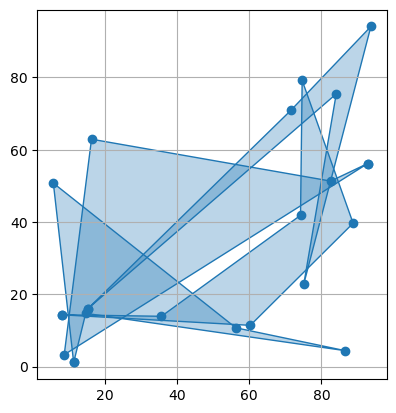

In [180]:
rp = generate_random_polygons(10)
print(len(rp))
for i in range(len(rp)):
    plotting.plot_polygon(rp[i])

In [188]:
import math
from shapely import Point, Polygon, affinity

In [189]:
# 生成指定面积的正多边形
def generate_regular_polygon(num_sides: int = 5, target_area: float = 1000) -> Polygon:
    """生成指定边数和面积的正多边形

    Args:
        num_sides (int): 指定边数
        target_area (float): 指定面积

    Returns:
        Polygon: 正多边形
    """
    edge_length = math.sqrt(
        (4 * target_area) / (num_sides * math.tan(math.pi / num_sides))
    )

    angles = [360 / num_sides * i for i in range(num_sides)]
    vertices = [
        (
            edge_length * math.cos(math.radians(angle)),
            edge_length * math.sin(math.radians(angle)),
        )
        for angle in angles
    ]

    polygon = Polygon(vertices)
    polygon = affinity.rotate(
        polygon, random.uniform(0, 360), use_radians=True
    )  # 旋转随机角度

    return polygon

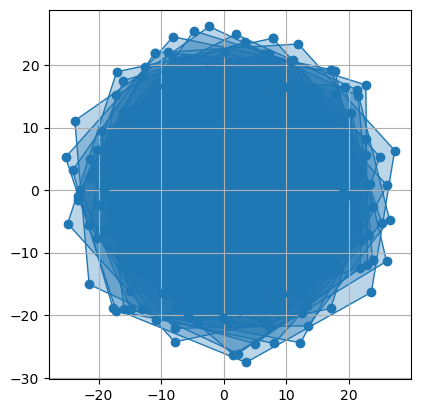

In [190]:
P = []
for _ in range(20):
    a = random.randint(300, 600)
    w = random.randint(5, 7)
    p = generate_regular_polygon(w, a)
    P.append(p)
    plotting.plot_polygon(p)
    

In [191]:
from shapely import Point, Polygon, affinity, LineString
import random
import math
from shapely.ops import nearest_points

In [192]:
# 判断是否与相邻的多边形临边平行
def are_nearest_edges_parallel(polygon1, polygon2):
    nearest_points_poly1, nearest_points_poly2 = nearest_points(polygon1, polygon2)

    nearest_line = LineString([nearest_points_poly1, nearest_points_poly2])

    x1, y1 = nearest_points_poly1.x, nearest_points_poly1.y
    x2, y2 = nearest_points_poly2.x, nearest_points_poly2.y

    if x2 != x1:
        slope = (y2 - y1) / (x2 - x1)
    else:
        slope = float("inf")

    nearest_edge_poly1 = nearest_line.distance(polygon1.exterior)
    nearest_edge_poly2 = nearest_line.distance(polygon2.exterior)

    if nearest_edge_poly1 == nearest_edge_poly2 and slope != float("inf"):
        return True

    return False

(<matplotlib.patches.PathPatch at 0x1fb93ffc490>,
 <matplotlib.lines.Line2D at 0x1fb941345d0>)

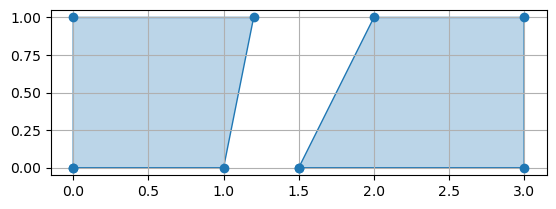

In [211]:
polygon1 = Polygon([(0, 0), (1, 0), (1.2, 1), (0, 1), (0, 0)])
polygon2 = Polygon([(1.5, 0), (3, 0), (3, 1), (2, 1), (1.5, 0)])
plotting.plot_polygon(polygon1)
plotting.plot_polygon(polygon2)

In [204]:
result = are_nearest_edges_parallel(polygon1, polygon2)
print("两个不重叠多边形的最近边是否平行:", result)

两个不重叠多边形的最近边是否平行: False


In [217]:
nearest_points_poly1, nearest_points_poly2 = nearest_points(polygon1, polygon2)

In [218]:
print("多边形1的最近点:", nearest_points_poly1)
print("多边形2的最近点:", nearest_points_poly2)

多边形1的最近点: POINT (1.0192307692307692 0.0961538461538461)
多边形2的最近点: POINT (1.5 0)


In [220]:
from shapely import Point, Polygon, affinity, LineString, oriented_envelope
import random
import math
from shapely.ops import nearest_points

In [221]:
# 计算所有多边形的最小旋转矩形
def get_min_bounding_rectangles(polygons: [Polygon]) -> Polygon:
    """计算所有多边形的最小旋转矩形

    Args:
        polygons ([Polygon]): 多边形列表

    Returns:
        Polygon: 最小旋转矩形
    """
    return oriented_envelope(polygons)

(<matplotlib.patches.PathPatch at 0x1fb94052390>,
 <matplotlib.lines.Line2D at 0x1fb93f8ce90>)

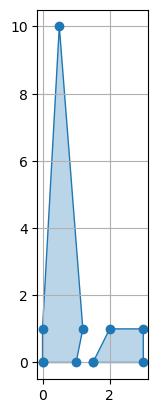

In [229]:
p1 = Polygon([(0, 0), (1, 0), (1.2, 1), (0.5, 10), (0, 1), (0, 0)])
p2 = Polygon([(1.5, 0), (3, 0), (3, 1), (2, 1), (1.5, 0)])
plotting.plot_polygon(p1)
plotting.plot_polygon(p2)

In [230]:
p = get_min_bounding_rectangles(GeometryCollection([p1, p2]))

In [231]:
print(p)

POLYGON ((0 0, 0 10, 3 10, 3 0, 0 0))


(<matplotlib.patches.PathPatch at 0x1fb941372d0>,
 <matplotlib.lines.Line2D at 0x1fb92bafed0>)

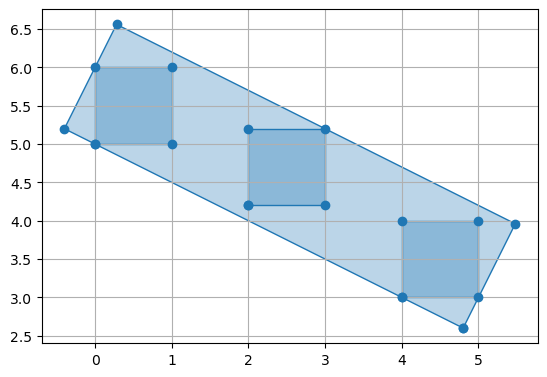

In [238]:
p1 = Polygon([(0, 5), (1, 5), (1, 6), (0, 6), (0, 5)])
p2 = Polygon([(4, 3), (5, 3), (5,4), (4, 4), (4, 3)])
p3 = Polygon([(2, 4.2), (3, 4.2), (3, 5.2), (2, 5.2), (2, 4.2)])
plotting.plot_polygon(p1)
plotting.plot_polygon(p2)
plotting.plot_polygon(p3)
p = get_min_bounding_rectangles(GeometryCollection([p1, p2, p3]))
plotting.plot_polygon(p)

In [54]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import seaborn as sns; sns.set()  // seaborn 库用来美化图表; sns.set() 用来设置图表样式
plt.ion()
import matplotlib.patches as patches
from PyQt6.QtWidgets import QApplication, QMainWindow
from PyQt6.QtWidgets import QApplication, QMainWindow, QVBoxLayout, QPushButton, QWidget
from shapely.geometry import Polygon, LineString, MultiLineString, Point, LinearRing
from shapely import plotting, MultiPoint, MultiPolygon, GeometryCollection
from shapely.affinity import translate, scale  # translate 库用来平移多边形; scale 库用来缩放多边形
from shapely.ops import orient  # orient 库用来判断多边形的方向
import math
import random

from gui.main import Ui_MainWindow

In [8]:
def get_coords_from_bottom_left(pentagon):
    coords = list(pentagon.exterior.coords)[
        :-1
    ]  # Exclude the last coordinate since it's the same as the first

    # Identify the bottom-left vertex (smallest y-value and then smallest x-value)
    bottom_left = min(coords, key=lambda v: (v[1], v[0]))
    index_bottom_left = coords.index(bottom_left)

    # Rearrange the vertices to start from the bottom-left vertex and go in counterclockwise order
    reordered_coords = coords[index_bottom_left:] + coords[:index_bottom_left]

    return reordered_coords

In [2]:
p = Polygon([(0,0), (1,1), (0, 1), (1, 0)])

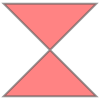

In [15]:
p

In [16]:
print(p.intersection)

<bound method BaseGeometry.intersection of <POLYGON ((0 0, 1 1, 0 1, 1 0, 0 0))>>


In [10]:
p.convex_hull
print(list(p.convex_hull.exterior.coords))
print(p.convex_hull.exterior.coords)

[(0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0)]


In [14]:
t2 = p.envelope
print(t2)


POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))


In [14]:
list(p.exterior.coords)

[(0.0, 0.0), (1.0, -1.0), (2.0, 1.0), (1.0, 3.0), (-1.0, 2.0), (0.0, 0.0)]

In [19]:
print(LinearRing(p.exterior.coords).is_ccw)

True


(<matplotlib.patches.PathPatch at 0x1d218e1a010>,
 <matplotlib.lines.Line2D at 0x1d21a011750>)

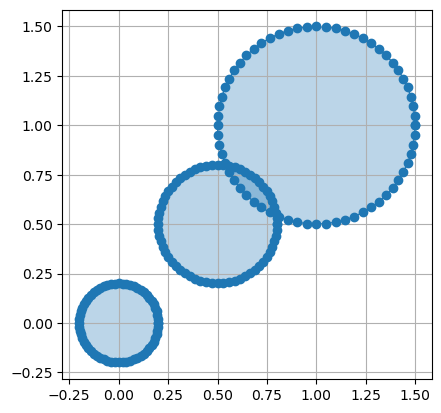

In [58]:
p1 = Point(0, 0).buffer(0.2)  # 生成一个圆形(半径为0.2)
p2 = Point(1, 1).buffer(0.5)  # 生成一个圆形(半径为0.5)
p3 = Point(0.5, 0.5).buffer(0.3)
plotting.plot_polygon(p1)
plotting.plot_polygon(p2)
plotting.plot_polygon(p3)

In [29]:
points.intersects(p2)

True

True

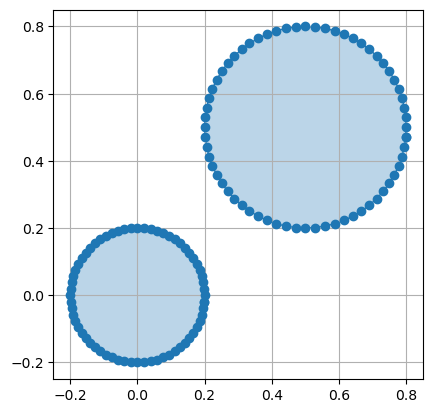

In [68]:
p = MultiPoint()
p = p.union(p1)
p = p.union(p3)
plotting.plot_polygon(p)
p.intersects(p2)

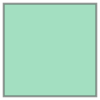

In [70]:
p1 = Polygon([(0, 0), (1, 0), (1, 1), (0, 1)]).buffer(0)
p1

In [74]:
list(p1.exterior.coords)

[(0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0)]